In [97]:
# Load the required libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split as split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

In [55]:
df = read_csv("ppg-glucose-dataset.csv")

In [56]:
df.isna().sum()

PPG_Signal        0
Patient_Id        0
Heart_Rate        0
Systolic_Peak     0
Diastolic_Peak    0
Pulse_Area        0
index             0
Gender            0
Age               0
Glucose_level     0
Height            0
Weight            0
pl                0
dtype: int64

In [57]:
df.head()

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Age,Glucose_level,Height,Weight,pl
0,511,1,77.0,522.0,505.0,393.0,0,1,38,99,180,53,1
1,511,1,77.0,522.0,505.0,393.0,1,1,38,102,180,53,2
2,511,1,77.0,522.0,505.0,393.0,2,1,38,103,180,53,3
3,511,1,77.0,522.0,505.0,393.0,3,1,38,128,180,53,4
4,511,1,77.0,522.0,505.0,393.0,4,1,38,130,180,53,5


In [75]:
df = df.drop_duplicates()

In [82]:
X = df.drop(columns=["Patient_Id", "index", 'Glucose_level', 'pl'])
y = df['Glucose_level']
stratify_column = df['Patient_Id']

In [83]:
print(f"Feature size: {X.shape}")
print(f"Target size: {y.shape}")

Feature size: (844946, 9)
Target size: (844946,)


In [84]:
X_train, X_test, y_train, y_test = split(X, y, stratify=stratify_column, test_size=0.25, random_state=42)

In [85]:
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

In [90]:
lnn = LinearRegression().fit(Xs_train, y_train)
print(f"Linear regression: {lnn.score(Xs_test, y_test):.3%}")
y_pred = lnn.predict(Xs_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Intercept:", lnn.intercept_)
print("Coefficients:", lnn.coef_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Linear regression: 10.986%
Intercept: 115.40603810266227
Coefficients: [ 1.01132259  1.98729247 -1.51156923  1.2947086   0.04519982  2.76417898
  1.37917885 -1.03356672  3.25020769]
Mean Squared Error: 324.681206477624
R² Score: 0.10986305484141878


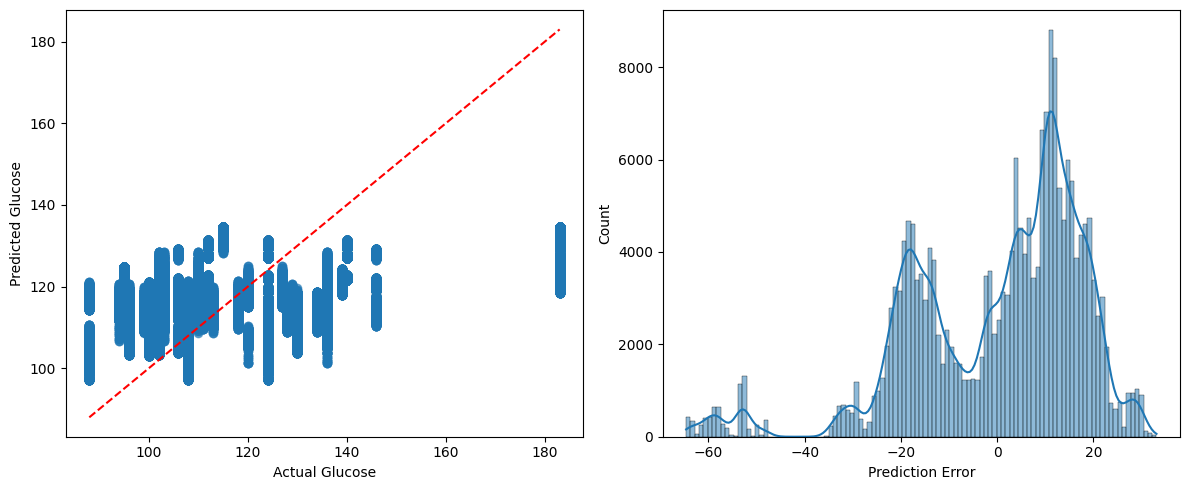

In [94]:
# Plot results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Glucose')
plt.ylabel('Predicted Glucose')

plt.subplot(1,2,2)
sns.histplot(y_pred - y_test, kde=True)
plt.xlabel('Prediction Error')
plt.tight_layout()
plt.show()

In [95]:
# Create a pipeline for polynomial regression
poly_pipeline = Pipeline([
('poly_features', PolynomialFeatures(degree=2)), # Degree of polynomial
('linear_regression', LinearRegression())
])

# Fit the model
poly_pipeline.fit(Xs_train, y_train)
print(f"Polynomial regression: {poly_pipeline.score(Xs_test, y_test):.3%}")
y_pred = lnn.predict(Xs_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Polynomial regression: 37.260%
Mean Squared Error: 324.681206477624
R² Score: 0.10986305484141878


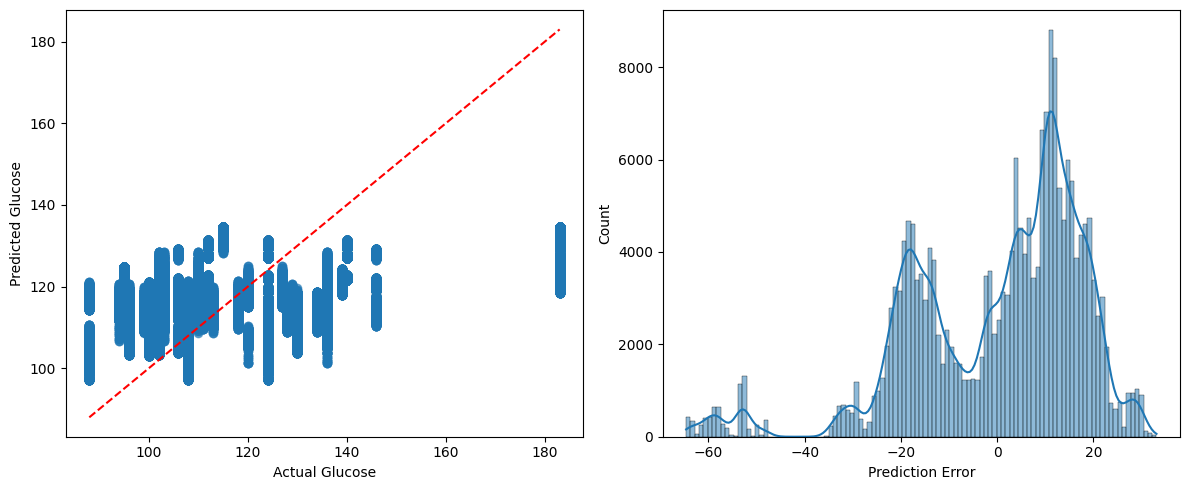

In [96]:
# Plot results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Glucose')
plt.ylabel('Predicted Glucose')

plt.subplot(1,2,2)
sns.histplot(y_pred - y_test, kde=True)
plt.xlabel('Prediction Error')
plt.tight_layout()
plt.show()

In [98]:
joblib.dump(poly_pipeline, "poly_pipeline.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']